# Домашнее задание №1, Иванов Александр, группа 573

### №1(б)

$$
    \text{extr}(|x_1|^\lambda + 2|x_2|^\lambda), \ x_1^2 + 4x_2^2=4, \lambda \not = 0
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
from IPython.display import HTML
from scipy.optimize import minimize
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,10)

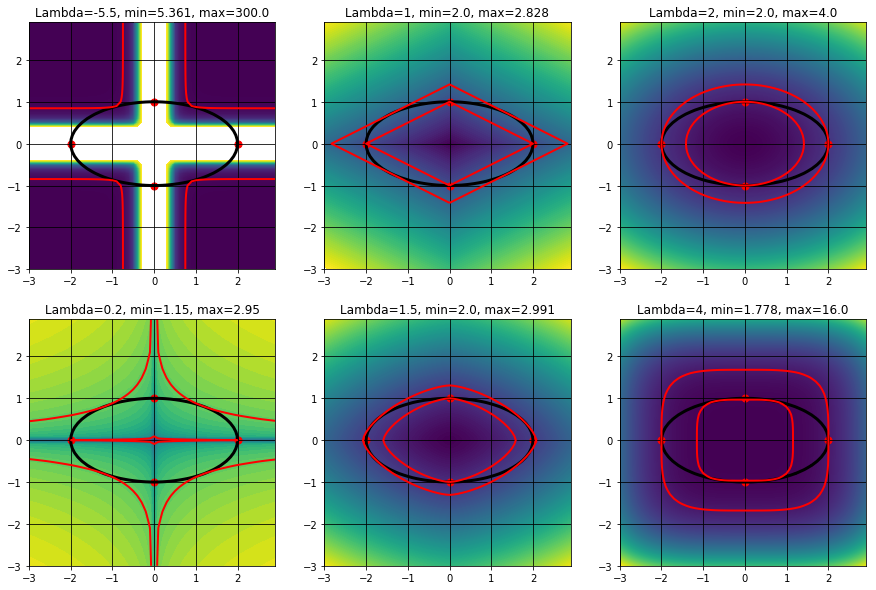

In [3]:
lmbd = None
def f(x1, x2):
    global lmbd
    
    res = 300
    if lmbd <= 0 and (abs(x1) < 0.001 or abs(x2) < 0.001):
        res = 300
    else:
        res = np.abs(x1) ** lmbd + 2 * np.abs(x2) ** lmbd
    if res > 300:
        return 300
    return res

X = np.arange(-3,3,0.1)
              
xx, yy = np.meshgrid(X, X)
fig, axarr = plt.subplots(2, 3)
for index, t in enumerate([-5.5, 0.2, 1, 1.5, 2, 4]):
    lmbd = t
    curve = np.array([np.array([2 * np.cos(t), np.sin(t)]) for t in np.linspace(-np.pi, np.pi, 1000)])
    
    res =  np.array([ f(t[0], t[1]) for t in curve ] )
    
    f_val = np.array([ f(i[0], i[1]) for i in np.c_[xx.ravel(), yy.ravel()] ]).reshape(xx.shape)
    
    min_value, max_value = np.min(res), np.max(res)

    axarr[index % 2, index // 2].contourf(xx, yy, f_val, np.arange(0, np.round(np.max(f_val)), 0.1), cmap='viridis')
    axarr[index % 2, index // 2].contour(xx, yy, xx**2 + 4 * yy**2 - 4, 0, colors='black', linewidths=3)

    axarr[index % 2, index // 2].contour(xx, yy, f_val, (min_value,max_value), colors='r', linewidths=2)
    axarr[index % 2, index // 2].grid(c='black')
    axarr[index % 2, index // 2].set_title('Lambda={}, min={}, max={}'.format(lmbd, round(min_value, 3), round(max_value, 3)))
    axarr[index % 2, index // 2].scatter([0, 0, 2, -2], [1, -1, 0, 0], color='red', s=50)
    
    

Параметризуем кривую: $ x = 2 \cos(t) \ y = \sin(t) $ 

Тогда $f(x, y) = |2 \cos t |^\lambda + 2|\sin t|^\lambda$, в силу симметрии будем считать, что $0 \le t \le \pi / 2$.

$$ \dfrac{df}{dt} = \dfrac{d}{dt} \left ( (2 \cos t )^\lambda + 2(\sin t)^\lambda  \right ) = \lambda \left ( (2 \cos t) ^ {\lambda - 1} \cdot (- 2 \sin t ) + 2 (\sin t)^{\lambda - 1} \cos t \right) = 2\lambda \left ( (2 \cos t) ^ {\lambda - 1} \cdot (- 2 \sin t ) + 2 (\sin t)^{\lambda - 1} \cos t \right) $$ Из этого получается, что точка касания удовлетворяет условию $ 2 (\sin t)^{\lambda - 2} = 2 \cdot (2 \cos t) ^ {\lambda - 2}$, также экстремальные значения возможны в точках пересечения эллипса с осями координат. Все случаи представлены на рисунке выше, значения в точках пересечения с осями и касания вычисляются тривиально. В точках пересечения с осями экстремумы гарантированно присутствуют в силу симметрии и непостоянности функции.

При $\lambda < 0$, точка касания с эллипсом также сохраняется и остается экстремумом (минимум), а точки пересечения эллипса с осями координат становятся точками максимума в силу того, что $f \to +\infty$

### №1(в)


$$ \text{extr}(x_1^2 + 4x_2^2), \ |x_1|^\lambda + 2|x_2|^\lambda \le 1, \ \lambda \not = 0 $$

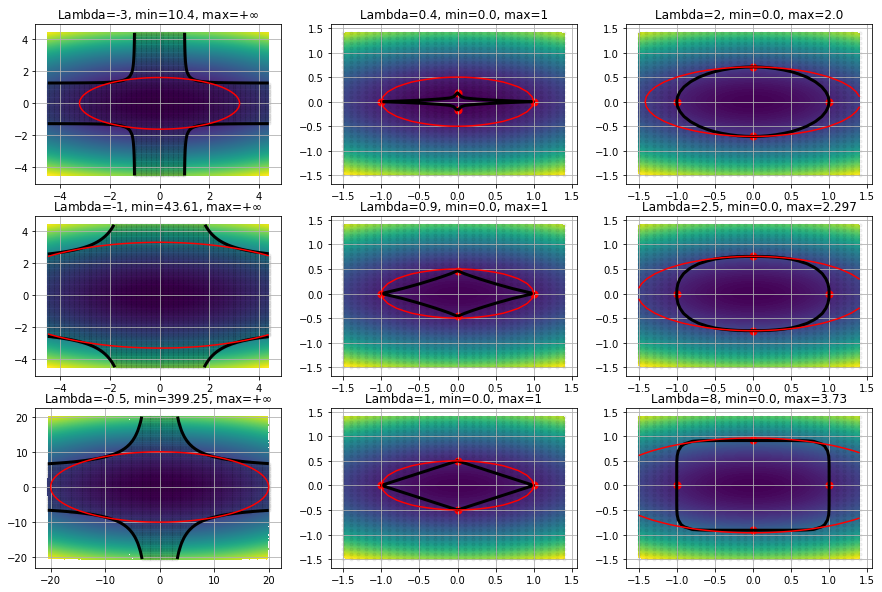

In [14]:
# Optimized function
def f(x):
    global lmbd
    return x[0] ** 2 + 4 * x[1] ** 2 

# Constraints of optimization
def constraints(t):
    global lmbd
    if lmbd < 0 and (abs(t[0]) < 0.001 or abs(t[1]) < 0.001):
        return -100
    return 1 - np.abs(t[0]) ** lmbd - 2 * np.abs(t[1]) ** lmbd

# Show subplots
fig, axarr = plt.subplots(3, 3)
for index, t in enumerate([-3, -1, -0.5, 0.4, 0.9, 1, 2, 2.5, 8]):
    lmbd = t
    
    # Create grid for drawing
    xx, yy, X = None, None, None
    if index >= 3:
        X = np.arange(-1.5,1.5,0.1)
        xx, yy = np.meshgrid(X, X)
    elif index < 2:
        X = np.arange(-4.5,4.5,0.1)
        xx, yy = np.meshgrid(X, X)
    elif index == 2:
        X = np.arange(-20.5,20.5,0.5)
        xx, yy = np.meshgrid(X, X)
    
    # Function values on grid
    f_val = np.array([ f(i) for i in np.c_[xx.ravel(), yy.ravel()] ]).reshape(xx.shape)
    
    # Constraints values on grid
    constraints_val = np.array([ constraints(i) for i in np.c_[xx.ravel(), yy.ravel()] ]).reshape(xx.shape)
    
    # Min and max values search (without scipyoptimize.minimize)
    min_value = 1e100
    max_value = -1e100
    for i, j in itertools.product(range(len(X)), range(len(X))):
        if constraints_val[i, j] >= 0:
            min_value = min(min_value, f_val[i, j])
            max_value = max(max_value, f_val[i ,j])
            
    if lmbd > 0:
        min_value = min(min_value, f((1, 0)), f((0, (0.5) ** (1/lmbd))))
        max_value = max(max_value, f((1, 0)), f((0, (0.5) ** (1/lmbd))))
    
    # Drawing colormap of optimized function
    axarr[index % 3, index // 3].contourf(xx, yy, f_val, np.arange(0, np.round(np.max(f_val)), 0.1), cmap='viridis')
    
    # Drawing optimization constraits
    axarr[index % 3, index // 3].contour(xx, yy, constraints_val, (0, ), colors=('black',), linewidths=(3,))
    
    # Drawing min and max levels
    axarr[index % 3, index // 3].contour(xx, yy, f_val, (min_value, max_value), colors=('red', 'red'))
    
    # Set the title as result
    axarr[index % 3, index // 3].set_title('Lambda={}, min={}, max={}'.format(lmbd, 
                                        round(min_value, 3) if min_value > -80 else '$-\infty$', 
                                        round(max_value, 3) if max_value <  80 else '$+\infty$'))
    
    df = pd.DataFrame(data = np.c_[xx.ravel(), yy.ravel(), constraints_val.ravel()], columns=['xx', 'yy', 'const'])
    df = df[df.const < 0 ]
    axarr[index % 3, index // 3].scatter(df.xx, df.yy, s=10, color='black', alpha=0.05)
    
    # Grid
    axarr[index % 3, index // 3].grid()
    
    # Plot local extr
    if lmbd > 0:
        axarr[index % 3, index // 3].scatter([1, -1, 0, 0], [0, 0, (0.5) ** (1/lmbd), -(0.5) ** (1/lmbd)], color='red', s=50)

### №1(г)

$$ \text{extr}(x_1^2 + 4x_2^2), \ |x_1|^\lambda + 2|x_2|^\lambda = 1, \ \lambda \not = 0 $$

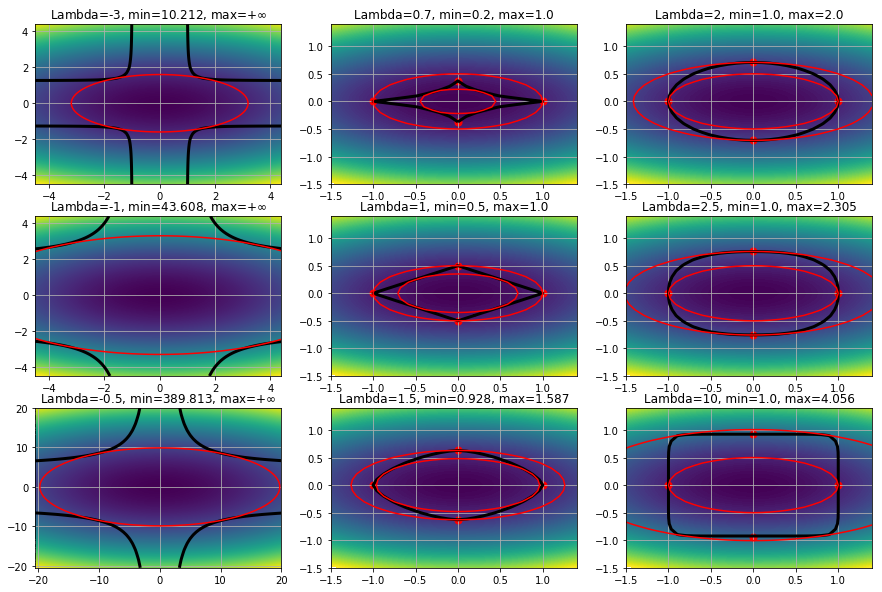

In [13]:
# Optimized function
def f(x):
    global lmbd
    return x[0] ** 2 + 4 * x[1] ** 2 

# Constraints of optimization
def constraints(t):
    global lmbd
    if lmbd < 0 and (abs(t[0]) < 0.001 or abs(t[1]) < 0.001):
        return -100
    return 1 - np.abs(t[0]) ** lmbd - 2 * np.abs(t[1]) ** lmbd

def pho(phi):
    global lmbd
    cs = np.cos(phi) if np.cos(phi) != 0 else 0.00001
    sn = np.sin(phi) if np.sin(phi) != 0 else 0.00001
    
    return ( 1 / (abs(cs) ** lmbd + 2 * abs(sn) ** lmbd) ) ** (1 / lmbd)
    
    
    
    
# Show subplots
fig, axarr = plt.subplots(3, 3)
for index, t in enumerate([-3, -1, -0.5, 0.7, 1, 1.5, 2, 2.5, 10]):
    lmbd = t
    
    # Create grid for drawing
    xx, yy, X = None, None, None
    if index >= 3:
        X = np.arange(-1.5,1.5,0.1)
        xx, yy = np.meshgrid(X, X)
    elif index < 2:
        X = np.arange(-4.5,4.5,0.1)
        xx, yy = np.meshgrid(X, X)
    elif index == 2:
        X = np.arange(-20.5,20.5,0.5)
        xx, yy = np.meshgrid(X, X)
    
    # Parametrical curve representation
    curve = np.array([np.array([np.cos(t) * pho(t), np.sin(t) * pho(t)]) 
                      for t in np.linspace(-np.pi, np.pi, 1000)])
    
    # F values on curve and grid
    f_val_curve = np.array([f(t) for t in curve])
    f_val = np.array([ f(i) for i in np.c_[xx.ravel(), yy.ravel()] ]).reshape(xx.shape)
    
    # Constraints values on grid
    constraints_val = np.array([ constraints(i) for i in np.c_[xx.ravel(), yy.ravel()] ]).reshape(xx.shape)
    
    min_value = np.min(f_val_curve)
    max_value = np.max(f_val_curve)

    
    # Drawing colormap of optimized function
    
    axarr[index % 3, index // 3].contourf(xx, yy, f_val, np.arange(0, np.round(np.max(f_val)), 0.1), cmap='viridis')
    
    # Drawing optimization constraits
    axarr[index % 3, index // 3].contour(xx, yy, constraints_val, (0, ), colors=('black',), linewidths=(3,))
    
    # Drawing min and max levels
    axarr[index % 3, index // 3].contour(xx, yy, f_val, (min_value, max_value), colors=('red', 'red'))
    
    # Set the title as result
    axarr[index % 3, index // 3].set_title('Lambda={}, min={}, max={}'.format(lmbd, 
                                        round(min_value, 3) if min_value > -80 else '$-\infty$', 
                                        round(max_value, 3) if max_value <  80 else '$+\infty$'))
    
    # Grid
    axarr[index % 3, index // 3].grid()
    
    # Plot local extr
    if lmbd > 0:
        axarr[index % 3, index // 3].scatter([1, -1, 0, 0], [0, 0, (0.5) ** (1/lmbd), -(0.5) ** (1/lmbd)], color='red', s=50)

Пусть $x, y \geq 0$, это возможно принять к рассмотрению в силу симметрии картины относительно осей $x_1, x_2$. Рассмотрим параметризацию области определения $x = \sqrt[\lambda]{\rho^2\sin^2 t},\ y = \sqrt[\lambda]{ \rho^2\cos^2 t } / 2$, причем $\rho \in [0, \ 1],\ t \in [0, \ 2\pi]$.

Преобразуя предыдущее, $x = \left( \rho\sin t \right )^{\frac{2}{\lambda}},\ y = \left (\dfrac{\rho^2\cos^2(t)}{2} \right ) ^{\frac{1}{\lambda}}$. Таким образом, $f(x, y) = \varphi(t, \rho) = \left (\rho\sin t \right )^{\frac{4}{\lambda}} + 4 \left (\frac{\rho^2\cos^2(t)}{2} \right )^{\frac{2}{\lambda}}$.

Для наличия экстремума необходимо равенство нулю всех частных производным либо отсутствие некоторых из них (что возникает лишь на пересечении с осями координат либо при наличии асимптот)

$$
\frac{4}{\lambda} \sin^{\frac{4}{\lambda}} (t) \rho^{\frac{4 - \lambda}{\lambda}} + \frac{8}{\lambda} \left( \frac{\cos^2(t)}{2}\right )^{\frac{2}{\lambda}}\rho^{2 \cdot \frac{2 - \lambda}{\lambda}} 2\rho = 0
\ \ \ \ \ \ \ \ \ \ \ \ \
\frac{4}{\lambda}\rho^{\frac{4}{\lambda}}\sin^{\frac{4 - \lambda}{\lambda}} (t)\cos t + \frac{8}{\lambda}\left (\frac{\rho^2}{2} \right )^{\frac{2}{\lambda}}(\cos t)^{2 \cdot \frac{2 - \lambda}{\lambda}}2\cos(t)(-\sin(t)) = 0
$$

Одним из решений системы, очевидно является случай $\rho = 0$. Также из первого условия понятно, что других внутренних экстремумов нет (в).

Продолжим исследование для пункта (г):
Рассматривая лишь второе условие при $\rho = 1$ (т.к. интересуемся лишь границей), можем понять, что оно разрешимо относительно $t$ во всех случаях, кроме $\lambda = 2$
$$
\left (\tan t \right )^{\frac{4 - 2\lambda}{\lambda}} = 2^{\frac{2\lambda - 2}{\lambda}},
$$

Из этого получаем вдобавок к переечениям с осями еще 4 кандидата на экстремумы, которые проверяются, например, из рисунка.